In [60]:
import numpy as np
import pandas as pd
from visits import Visit, Cohort, MissingDataError, holm_bonferroni, rolling_variance, rolling_autocorrelation
import glob
import pymannkendall as mk
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind
import seaborn as sb
from matplotlib import rc

In [2]:
cohort_1_details = pd.read_csv("cohort_1_details_v5.csv", sep=',')
cohort_2_details = pd.read_csv("cohort_2_details_v5.csv", sep=',')
cohort_3_details = pd.read_csv("cohort_3_details_v5.csv", sep=',')
cohort_4_details = pd.read_csv("cohort_4_details_v5.csv", sep=',')

In [3]:
var_hr_c1_failed = pd.read_csv("variance_failed_tests_c1.csv", sep=",")
var_rr_c1_failed = pd.read_csv("variance_rr_failed_tests_c1.csv", sep=",")
var_abf_c1_failed = pd.read_csv("variance_abf_failed_tests_c1.csv", sep=",")

ac_hr_c1_failed = pd.read_csv("ac_hr_failed_tests_c1.csv", sep=",")
ac_rr_c1_failed = pd.read_csv("ac_rr_failed_tests_c1.csv", sep=",")
ac_abf_c1_failed = pd.read_csv("ac_abf_failed_tests_c1.csv", sep=",")



In [4]:
var_hr_c1_results = pd.read_csv("variance_results_c1.csv", sep=",")
var_rr_c1_results = pd.read_csv("variance_rr_results_c1.csv", sep=",")
var_abf_c1_results = pd.read_csv("variance_abf_results_c1.csv", sep=",")

ac_hr_c1_results = pd.read_csv("autocorrelation_hr_results_c1.csv", sep=",")
ac_rr_c1_results = pd.read_csv("autocorrelation_rr_results_c1.csv", sep=",")
ac_abf_c1_results = pd.read_csv("autocorrelation_abf_results_c1.csv", sep=",")

In [5]:
var_hr_c1_results_tuples = list(zip(var_hr_c1_results["Project ID"], var_hr_c1_results["visit_no"]))
var_hr_c1_failed_tuples = list(zip(var_hr_c1_failed["Project ID"], var_hr_c1_failed["visit_no"]))

var_rr_c1_results_tuples = list(zip(var_rr_c1_results["Project ID"], var_rr_c1_results["visit_no"]))
var_rr_c1_failed_tuples = list(zip(var_rr_c1_failed["Project ID"], var_rr_c1_failed["visit_no"]))

var_abf_c1_results_tuples = list(zip(var_abf_c1_results["Project ID"], var_abf_c1_results["visit_no"]))
var_abf_c1_failed_tuples = list(zip(var_abf_c1_failed["Project ID"], var_abf_c1_failed["visit_no"]))

ac_hr_c1_results_tuples = list(zip(ac_hr_c1_results["Project ID"], ac_hr_c1_results["visit_no"]))
ac_hr_c1_failed_tuples = list(zip(ac_hr_c1_failed["Project ID"], ac_hr_c1_failed["visit_no"]))

ac_rr_c1_results_tuples = list(zip(ac_rr_c1_results["Project ID"], ac_rr_c1_results["visit_no"]))
ac_rr_c1_failed_tuples = list(zip(ac_rr_c1_failed["Project ID"], ac_rr_c1_failed["visit_no"]))

ac_abf_c1_results_tuples = list(zip(ac_abf_c1_results["Project ID"], ac_abf_c1_results["visit_no"]))
ac_abf_c1_failed_tuples = list(zip(ac_abf_c1_failed["Project ID"], ac_abf_c1_failed["visit_no"]))

In [6]:
# for project_id, visit_no in zip(cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):

# cohort_1_details["var_hr_flag"] = np.where((var_hr_c1_failed["Project ID"] == cohort_1_details["Project ID"]).any() & (var_hr_c1_failed["visit_no"] == cohort_1_details["icu_visit"]).any(), 0, None)
# np.where(list(zip(var_hr_c1_failed["Project ID"],var_hr_c1_failed["visit_no"])).count((cohort_1_details["Project ID"], cohort_1_details["icu_visit"]))>0, 0, None)
# [0 if any(project_id, visit_no in zip(var_hr_c1_failed["Project ID"], var_hr_c1_failed["icu_visit"])) for project_id, visit_no in cohort_1_details["Project ID"], cohort_1_details["icu_visit"]]

In [7]:
cohort_1_details["var_hr_flag"] = None
cohort_1_details["var_rr_flag"] = None
cohort_1_details["var_abf_flag"] = None
cohort_1_details["ac_hr_flag"] = None
cohort_1_details["ac_rr_flag"] = None
cohort_1_details["ac_abf_flag"] = None

In [8]:
for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in var_hr_c1_results_tuples:
        cohort_1_details["var_hr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in var_hr_c1_failed_tuples:
        cohort_1_details["var_hr_flag"].loc[idx] = 0

/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in var_rr_c1_results_tuples:
        cohort_1_details["var_rr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in var_rr_c1_failed_tuples:
        cohort_1_details["var_rr_flag"].loc[idx] = 0

In [10]:
for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in var_abf_c1_results_tuples:
        cohort_1_details["var_abf_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in var_abf_c1_failed_tuples:
        cohort_1_details["var_abf_flag"].loc[idx] = 0

In [11]:
for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in ac_hr_c1_results_tuples:
        cohort_1_details["ac_hr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in ac_hr_c1_failed_tuples:
        cohort_1_details["ac_hr_flag"].loc[idx] = 0

In [12]:
for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in ac_rr_c1_results_tuples:
        cohort_1_details["ac_rr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in ac_rr_c1_failed_tuples:
        cohort_1_details["ac_rr_flag"].loc[idx] = 0

In [13]:
for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in ac_abf_c1_results_tuples:
        cohort_1_details["ac_abf_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_1_details.index, cohort_1_details["Project ID"], cohort_1_details["icu_visit"]):
    if (project_id, visit_no) in ac_abf_c1_failed_tuples:
        cohort_1_details["ac_abf_flag"].loc[idx] = 0

In [14]:
cohort_1_details

,Unnamed: 0,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,...,icu_ward,total_visits,extubation_duration,age (days),var_hr_flag,var_rr_flag,var_abf_flag,ac_hr_flag,ac_rr_flag,ac_abf_flag
0,85,KH0067,2003-01-22 00:00:00,NaN,Female,2,2016-10-13 22:30:00,2016-12-03 15:54:00,1.0,2016-10-16 10:30:00,...,PICU,2,360.0,5016.458333,0,0,0,0,0,0
1,165,JJ0136,2001-06-12 00:00:00,NaN,Female,2,2016-06-22 02:00:00,2016-08-22 18:08:00,1.0,2016-07-05 12:15:00,...,FLAMI,2,285.0,5502.541667,0,0,0,0,0,0
2,204,SZ0162,2006-01-09 00:00:00,NaN,Male,1,2016-04-12 15:30:00,2016-05-12 13:00:00,1.0,2016-04-28 16:00:00,...,PICU,1,420.0,3762.666667,0,0,None,0,0,None
3,239,PC0192,2004-06-22 00:00:00,NaN,Male,1,2016-12-22 11:53:00,2017-02-18 17:13:00,1.0,2017-01-10 18:00:00,...,FLAMI,1,1200.0,4572.750000,0,1,1,1,0,0
4,314,GP0251,2001-10-06 00:00:00,NaN,Male,1,2018-06-25 14:44:00,2018-07-06 16:07:00,1.0,2018-06-26 15:00:00,...,PICU,1,1100.0,6107.750000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5424,VV3912,2018-08-23 00:00:00,NaN,Male,2,2018-11-13 14:32:00,2018-11-17 17:20:00,1.0,2018-11-14 18:00:00,...,PICU,3,180.0,83.750000,0,None,None,0,None,None
116,5484,PL3964,2018-09-29 00:00:00,NaN,Male,1,2018-10-10 17:30:00,2018-11-17 13:06:00,1.0,2018-10-22 15:00:00,...,NICU,1,900.0,23.625000,0,0,None,0,0,None
117,5496,RD3976,2018-10-14 00:00:00,NaN,Male,1,2018-10-16 05:45:00,2018-10-23 19:09:00,1.0,2018-10-19 11:00:00,...,NICU,1,600.0,5.458333,1,0,None,0,0,None
118,5565,TV4037,2018-09-28 00:00:00,NaN,Male,1,2018-12-12 20:00:00,2018-12-18 16:17:00,1.0,2018-12-13 11:50:00,...,PICU,2,1330.0,76.493750,0,0,None,0,0,None


In [15]:
cohort_1_details.to_csv("cohort_1_details_flags.csv")

In [16]:
var_hr_c2_failed = pd.read_csv("variance_failed_tests_c2.csv", sep=",")
var_rr_c2_failed = pd.read_csv("variance_rr_failed_tests_c2.csv", sep=",")
var_abf_c2_failed = pd.read_csv("variance_abf_failed_tests_c2_pt1.csv", sep=",")

ac_hr_c2_failed = pd.read_csv("ac_hr_failed_tests_c2_partial.csv", sep=",")
ac_rr_c2_failed = pd.read_csv("ac_rr_failed_tests_c2_partial.csv", sep=",")
ac_abf_c2_failed = pd.read_csv("ac_abf_failed_tests_c2.csv", sep=",")

not sure if flags needed for cohort 2

In [17]:
var_hr_c3_failed = pd.read_csv("variance_hr_failed_tests_c3.csv", sep=",")
var_rr_c3_failed = pd.read_csv("variance_rr_failed_tests_c3.csv", sep=",")
var_abf_c3_failed = pd.read_csv("variance_abf_failed_tests_c3.csv", sep=",")

ac_hr_c3_failed = pd.read_csv("autocorrelation_hr_failed_tests_c3.csv", sep=",")
ac_rr_c3_failed = pd.read_csv("autocorrelation_rr_failed_tests_c3.csv", sep=",")
ac_abf_c3_failed = pd.read_csv("autocorrelation_abf_failed_tests_c3.csv", sep=",")

var_hr_c3_results = pd.read_csv("variance_hr_results_c3.csv", sep=",")
var_rr_c3_results = pd.read_csv("variance_rr_results_c3.csv", sep=",")
var_abf_c3_results = pd.read_csv("variance_abf_results_c3.csv", sep=",")

ac_hr_c3_results = pd.read_csv("autocorrelation_hr_results_c3.csv", sep=",")
ac_rr_c3_results = pd.read_csv("autocorrelation_rr_results_c3.csv", sep=",")
ac_abf_c3_results = pd.read_csv("autocorrelation_abf_results_c3.csv", sep=",")

cohort_3_details["var_hr_flag"] = None
cohort_3_details["var_rr_flag"] = None
cohort_3_details["var_abf_flag"] = None
cohort_3_details["ac_hr_flag"] = None
cohort_3_details["ac_rr_flag"] = None
cohort_3_details["ac_abf_flag"] = None

var_hr_c3_results_tuples = list(zip(var_hr_c3_results["Project ID"], var_hr_c3_results["visit_no"]))
var_hr_c3_failed_tuples = list(zip(var_hr_c3_failed["Project ID"], var_hr_c3_failed["visit_no"]))

var_rr_c3_results_tuples = list(zip(var_rr_c3_results["Project ID"], var_rr_c3_results["visit_no"]))
var_rr_c3_failed_tuples = list(zip(var_rr_c3_failed["Project ID"], var_rr_c3_failed["visit_no"]))

var_abf_c3_results_tuples = list(zip(var_abf_c3_results["Project ID"], var_abf_c3_results["visit_no"]))
var_abf_c3_failed_tuples = list(zip(var_abf_c3_failed["Project ID"], var_abf_c3_failed["visit_no"]))

ac_hr_c3_results_tuples = list(zip(ac_hr_c3_results["Project ID"], ac_hr_c3_results["visit_no"]))
ac_hr_c3_failed_tuples = list(zip(ac_hr_c3_failed["Project ID"], ac_hr_c3_failed["visit_no"]))

ac_rr_c3_results_tuples = list(zip(ac_rr_c3_results["Project ID"], ac_rr_c3_results["visit_no"]))
ac_rr_c3_failed_tuples = list(zip(ac_rr_c3_failed["Project ID"], ac_rr_c3_failed["visit_no"]))

ac_abf_c3_results_tuples = list(zip(ac_abf_c3_results["Project ID"], ac_abf_c3_results["visit_no"]))
ac_abf_c3_failed_tuples = list(zip(ac_abf_c3_failed["Project ID"], ac_abf_c3_failed["visit_no"]))

In [18]:
for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in var_hr_c3_results_tuples:
        cohort_3_details["var_hr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in var_hr_c3_failed_tuples:
        cohort_3_details["var_hr_flag"].loc[idx] = 0

/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in var_rr_c3_results_tuples:
        cohort_3_details["var_rr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in var_rr_c3_failed_tuples:
        cohort_3_details["var_rr_flag"].loc[idx] = 0

In [20]:
for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in var_abf_c3_results_tuples:
        cohort_3_details["var_abf_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in var_abf_c3_failed_tuples:
        cohort_3_details["var_abf_flag"].loc[idx] = 0

In [21]:
for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in ac_hr_c3_results_tuples:
        cohort_3_details["ac_hr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in ac_hr_c3_failed_tuples:
        cohort_3_details["ac_hr_flag"].loc[idx] = 0

In [22]:
for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in ac_rr_c3_results_tuples:
        cohort_3_details["ac_rr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in ac_rr_c3_failed_tuples:
        cohort_3_details["ac_rr_flag"].loc[idx] = 0

In [23]:
for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in ac_abf_c3_results_tuples:
        cohort_3_details["ac_abf_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_3_details.index, cohort_3_details["Project ID"], cohort_3_details["icu_visit"]):
    if (project_id, visit_no) in ac_abf_c3_failed_tuples:
        cohort_3_details["ac_abf_flag"].loc[idx] = 0

In [24]:
cohort_3_details

,Unnamed: 0,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,...,icu_ward,total_visits,extubation_duration,age (days),var_hr_flag,var_rr_flag,var_abf_flag,ac_hr_flag,ac_rr_flag,ac_abf_flag
0,49,OL0043,2000-07-12 00:00:00,2018-04-25 00:00:00,Female,2,2016-06-08 18:56:00,2016-06-09 13:01:00,NaN,NaN,...,PICU,2,1320.0,5811.083333,None,None,None,None,None,None
1,91,JT0073,2003-04-26 00:00:00,2018-08-18 00:00:00,Male,1,2018-07-27 12:50:00,2018-07-30 15:15:00,NaN,NaN,...,FLAMI,1,525.0,5573.635417,0,0,0,1,0,0
2,124,CD0102,2003-02-18 00:00:00,2018-09-17 00:00:00,Male,1,2017-08-05 09:37:00,2017-08-12 17:56:00,NaN,NaN,...,PICU,1,300.0,5286.791667,0,0,0,0,0,0
3,160,XX0133,2002-01-25 00:00:00,2018-01-24 00:00:00,Male,1,2016-02-15 01:15:00,2016-02-26 12:35:00,NaN,NaN,...,PICU,1,780.0,5140.458333,0,None,0,0,None,0
4,181,DN0147,2000-08-11 00:00:00,2017-08-19 00:00:00,Female,1,2016-10-13 23:45:00,2016-10-15 13:42:00,NaN,NaN,...,PICU,1,600.0,5908.583333,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,5461,PM3943,2018-09-19 00:00:00,2018-10-20 00:00:00,Male,1,2018-10-14 01:15:00,2018-10-20 23:10:00,NaN,NaN,...,PICU,1,60.0,31.958333,None,None,None,None,None,None
210,5483,IE3963,2013-04-09 00:00:00,2018-11-20 00:00:00,Female,1,2018-10-24 20:15:00,2018-11-20 18:46:00,NaN,NaN,...,FLAMI,1,660.0,2031.541667,None,None,0,0,1,0
211,5535,BB4010,2003-09-15 00:00:00,2018-11-20 00:00:00,Female,1,2018-11-06 02:00:00,2018-11-20 23:25:00,NaN,NaN,...,FLAMI,1,60.0,5545.958333,None,None,None,None,None,None
212,5551,WE4023,2018-11-10 00:00:00,2019-01-03 00:00:00,Female,2,2018-12-23 16:36:00,2019-01-03 10:20:00,NaN,NaN,...,NICU,2,870.0,54.395833,None,None,None,None,None,None


In [25]:
cohort_3_details.to_csv("cohort_3_details_flags.csv")

In [26]:
var_hr_c4_failed = pd.read_csv("variance_hr_failed_tests_c4.csv", sep=",")
var_rr_c4_failed = pd.read_csv("variance_rr_failed_tests_c4.csv", sep=",")
var_abf_c4_failed = pd.read_csv("variance_abf_failed_tests_c4.csv", sep=",")

ac_hr_c4_failed = pd.read_csv("autocorrelation_hr_failed_tests_c4.csv", sep=",")
ac_rr_c4_failed = pd.read_csv("autocorrelation_rr_failed_tests_c4.csv", sep=",")
ac_abf_c4_failed = pd.read_csv("autocorrelation_abf_failed_tests_c4.csv", sep=",")

var_hr_c4_results = pd.read_csv("variance_hr_results_c4.csv", sep=",")
var_rr_c4_results = pd.read_csv("variance_rr_results_c4.csv", sep=",")
var_abf_c4_results = pd.read_csv("variance_abf_results_c4.csv", sep=",")

ac_hr_c4_results = pd.read_csv("autocorrelation_hr_results_c4.csv", sep=",")
ac_rr_c4_results = pd.read_csv("autocorrelation_rr_results_c4.csv", sep=",")
ac_abf_c4_results = pd.read_csv("autocorrelation_abf_results_c4.csv", sep=",")

cohort_4_details["var_hr_flag"] = None
cohort_4_details["var_rr_flag"] = None
cohort_4_details["var_abf_flag"] = None
cohort_4_details["ac_hr_flag"] = None
cohort_4_details["ac_rr_flag"] = None
cohort_4_details["ac_abf_flag"] = None

var_hr_c4_results_tuples = list(zip(var_hr_c4_results["Project ID"], var_hr_c4_results["visit_no"]))
var_hr_c4_failed_tuples = list(zip(var_hr_c4_failed["Project ID"], var_hr_c4_failed["visit_no"]))

var_rr_c4_results_tuples = list(zip(var_rr_c4_results["Project ID"], var_rr_c4_results["visit_no"]))
var_rr_c4_failed_tuples = list(zip(var_rr_c4_failed["Project ID"], var_rr_c4_failed["visit_no"]))

var_abf_c4_results_tuples = list(zip(var_abf_c4_results["Project ID"], var_abf_c4_results["visit_no"]))
var_abf_c4_failed_tuples = list(zip(var_abf_c4_failed["Project ID"], var_abf_c4_failed["visit_no"]))

ac_hr_c4_results_tuples = list(zip(ac_hr_c4_results["Project ID"], ac_hr_c4_results["visit_no"]))
ac_hr_c4_failed_tuples = list(zip(ac_hr_c4_failed["Project ID"], ac_hr_c4_failed["visit_no"]))

ac_rr_c4_results_tuples = list(zip(ac_rr_c4_results["Project ID"], ac_rr_c4_results["visit_no"]))
ac_rr_c4_failed_tuples = list(zip(ac_rr_c4_failed["Project ID"], ac_rr_c4_failed["visit_no"]))

ac_abf_c4_results_tuples = list(zip(ac_abf_c4_results["Project ID"], ac_abf_c4_results["visit_no"]))
ac_abf_c4_failed_tuples = list(zip(ac_abf_c4_failed["Project ID"], ac_abf_c4_failed["visit_no"]))

In [27]:
for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in var_hr_c4_results_tuples:
        cohort_4_details["var_hr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in var_hr_c4_failed_tuples:
        cohort_4_details["var_hr_flag"].loc[idx] = 0

/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in var_rr_c4_results_tuples:
        cohort_4_details["var_rr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in var_rr_c4_failed_tuples:
        cohort_4_details["var_rr_flag"].loc[idx] = 0

In [29]:
for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in var_abf_c4_results_tuples:
        cohort_4_details["var_abf_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in var_abf_c4_failed_tuples:
        cohort_4_details["var_abf_flag"].loc[idx] = 0

In [30]:
for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in ac_hr_c4_results_tuples:
        cohort_4_details["ac_hr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in ac_hr_c4_failed_tuples:
        cohort_4_details["ac_hr_flag"].loc[idx] = 0

In [31]:
for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in ac_rr_c4_results_tuples:
        cohort_4_details["ac_rr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in ac_rr_c4_failed_tuples:
        cohort_4_details["ac_rr_flag"].loc[idx] = 0

In [32]:
for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in ac_abf_c4_results_tuples:
        cohort_4_details["ac_abf_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_4_details.index, cohort_4_details["Project ID"], cohort_4_details["icu_visit"]):
    if (project_id, visit_no) in ac_abf_c4_failed_tuples:
        cohort_4_details["ac_abf_flag"].loc[idx] = 0

In [33]:
cohort_4_details

,Unnamed: 0,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,failed_extubation_deid_date,...,re_intubation_deid_date,icu_ward,total_visits,age (days),var_hr_flag,var_rr_flag,var_abf_flag,ac_hr_flag,ac_rr_flag,ac_abf_flag
0,400,LP0324,2009-07-23 00:00:00,2017-09-18 00:00:00,Female,1,2016-09-17 15:20:00,2016-09-24 14:30:00,1.0,2016-09-19 12:00:00,...,2016-09-20 06:00:00,PICU,1,2615.506250,None,None,None,None,None,None
1,696,TK0564,2012-11-20 00:00:00,2017-10-31 00:00:00,Female,1,2017-09-22 08:30:00,2017-10-31 10:22:00,1.0,2017-09-23 07:00:00,...,2017-09-24 00:00:00,PICU,1,1768.291667,None,None,None,None,None,None
2,728,WA0589,2011-10-27 00:00:00,2017-05-15 00:00:00,Male,1,2017-05-08 17:30:00,2017-05-15 19:45:00,1.0,2017-05-09 07:00:00,...,2017-05-09 18:00:00,PICU,1,2021.291667,0,0,0,0,1,0
3,778,HP0630,2000-08-12 00:00:00,2017-06-03 00:00:00,Male,1,2017-04-08 20:10:00,2017-06-03 16:53:00,1.0,2017-04-10 21:00:00,...,2017-04-11 14:00:00,PICU,1,6085.875000,None,None,None,None,None,None
4,948,XP0759,2013-03-24 00:00:00,2018-01-15 00:00:00,Male,2,2017-07-11 13:00:00,2017-07-24 14:55:00,1.0,2017-07-14 10:00:00,...,2017-07-16 04:00:00,PICU,2,1573.416667,None,None,None,None,None,None
5,1284,JL0979,2015-08-15 00:00:00,2018-04-11 00:00:00,Male,2,2018-03-06 21:00:00,2018-04-10 09:53:00,1.0,2018-03-21 12:25:00,...,2018-03-22 14:00:00,PICU,2,949.875000,None,None,None,None,None,None
6,1467,UU1119,2014-09-28 00:00:00,2018-05-12 00:00:00,Male,1,2018-05-09 18:44:00,2018-05-12 18:47:00,1.0,2018-05-11 10:10:00,...,2018-05-12 05:35:00,PICU,1,1321.423611,None,None,None,None,None,None
7,1505,CN1142,2011-06-03 00:00:00,2016-07-18 00:00:00,Male,2,2016-05-14 16:48:00,2016-05-25 16:00:00,1.0,2016-05-16 12:00:00,...,2016-05-18 12:00:00,PICU,2,1809.541667,None,None,None,None,None,None
8,1777,DA1324,2013-10-05 00:00:00,2016-10-28 00:00:00,Female,1,2016-10-06 06:17:00,2016-10-28 22:30:00,1.0,2016-10-23 19:45:00,...,2016-10-23 22:43:00,PICU,1,1114.822917,0,0,0,0,1,1
9,2189,EK1591,2016-05-16 00:00:00,2016-10-22 00:00:00,Male,1,2016-05-18 17:01:00,2016-08-23 11:30:00,1.0,2016-06-18 01:00:00,...,2018-06-18 08:00:00,NICU,1,32.958333,None,None,None,None,None,None


In [34]:
cohort_4_details.to_csv("cohort_4_details_flags.csv")

In [35]:
var_hr_c2_failed = pd.read_csv("variance_failed_tests_c2.csv", sep=",")
var_rr_c2_failed = pd.read_csv("variance_rr_failed_tests_c2.csv", sep=",")
var_abf_c2_failed = pd.read_csv("variance_abf_failed_tests_c2_pt1.csv", sep=",")

ac_hr_c2_failed = pd.read_csv("ac_hr_failed_tests_c2_partial.csv", sep=",")
ac_rr_c2_failed = pd.read_csv("ac_rr_failed_tests_c2_partial.csv", sep=",")
ac_abf_c2_failed = pd.read_csv("ac_abf_failed_tests_c2.csv", sep=",")

var_hr_c2_results = pd.read_csv("variance_results_c2_entire.csv", sep=",")
var_rr_c2_results = pd.read_csv("variance_rr_results_c2_pt1.csv", sep=",")
var_abf_c2_results = pd.read_csv("variance_abf_results_c2_pt1.csv", sep=",")

ac_hr_c2_results = pd.read_csv("autocorrelation_hr_results_c2_partial.csv", sep=",")
ac_rr_c2_results = pd.read_csv("autocorrelation_rr_results_c2_partial.csv", sep=",")
ac_abf_c2_results = pd.read_csv("autocorrelation_abf_results_c2_partial.csv", sep=",")

cohort_2_details["var_hr_flag"] = None
cohort_2_details["var_rr_flag"] = None
cohort_2_details["var_abf_flag"] = None
cohort_2_details["ac_hr_flag"] = None
cohort_2_details["ac_rr_flag"] = None
cohort_2_details["ac_abf_flag"] = None

var_hr_c2_results_tuples = list(zip(var_hr_c2_results["Project ID"], var_hr_c2_results["visit_no"]))
var_hr_c2_failed_tuples = list(zip(var_hr_c2_failed["Project ID"], var_hr_c2_failed["visit_no"]))

var_rr_c2_results_tuples = list(zip(var_rr_c2_results["Project ID"], var_rr_c2_results["visit_no"]))
var_rr_c2_failed_tuples = list(zip(var_rr_c2_failed["Project ID"], var_rr_c2_failed["visit_no"]))

var_abf_c2_results_tuples = list(zip(var_abf_c2_results["Project ID"], var_abf_c2_results["visit_no"]))
var_abf_c2_failed_tuples = list(zip(var_abf_c2_failed["Project ID"], var_abf_c2_failed["visit_no"]))

ac_hr_c2_results_tuples = list(zip(ac_hr_c2_results["Project ID"], ac_hr_c2_results["visit_no"]))
ac_hr_c2_failed_tuples = list(zip(ac_hr_c2_failed["Project ID"], ac_hr_c2_failed["visit_no"]))

ac_rr_c2_results_tuples = list(zip(ac_rr_c2_results["Project ID"], ac_rr_c2_results["visit_no"]))
ac_rr_c2_failed_tuples = list(zip(ac_rr_c2_failed["Project ID"], ac_rr_c2_failed["visit_no"]))

ac_abf_c2_results_tuples = list(zip(ac_abf_c2_results["Project ID"], ac_abf_c2_results["visit_no"]))
ac_abf_c2_failed_tuples = list(zip(ac_abf_c2_failed["Project ID"], ac_abf_c2_failed["visit_no"]))

In [36]:
for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in var_hr_c2_results_tuples:
        cohort_2_details["var_hr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in var_hr_c2_failed_tuples:
        cohort_2_details["var_hr_flag"].loc[idx] = 0

/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in var_rr_c2_results_tuples:
        cohort_2_details["var_rr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in var_rr_c2_failed_tuples:
        cohort_2_details["var_rr_flag"].loc[idx] = 0

In [38]:
for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in var_abf_c2_results_tuples:
        cohort_2_details["var_abf_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in var_abf_c2_failed_tuples:
        cohort_2_details["var_abf_flag"].loc[idx] = 0

In [39]:
for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in ac_hr_c2_results_tuples:
        cohort_2_details["ac_hr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in ac_hr_c2_failed_tuples:
        cohort_2_details["ac_hr_flag"].loc[idx] = 0

In [40]:
for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in ac_rr_c2_results_tuples:
        cohort_2_details["ac_rr_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in ac_rr_c2_failed_tuples:
        cohort_2_details["ac_rr_flag"].loc[idx] = 0

In [41]:
for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in ac_abf_c2_results_tuples:
        cohort_2_details["ac_abf_flag"].loc[idx] = 1

for idx, project_id, visit_no in zip(cohort_2_details.index, cohort_2_details["Project ID"], cohort_2_details["icu_visit"]):
    if (project_id, visit_no) in ac_abf_c2_failed_tuples:
        cohort_2_details["ac_abf_flag"].loc[idx] = 0

In [42]:
cohort_2_details

,Unnamed: 0,Unnamed: 0.1,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,...,age (days),age_category,time_category,pseudo_reintubation,var_hr_flag,var_rr_flag,var_abf_flag,ac_hr_flag,ac_rr_flag,ac_abf_flag
0,0,4183,FJ2998,2017-09-24,NaN,Male,1,2017-09-28 16:15:00,2017-10-13 23:35:00,NaN,...,4.875000,1,10,2017-09-29 09:19:00,0,0,0,0,0,0
1,1,1807,ZA1349,2016-03-02,NaN,Female,1,2016-03-02 22:15:00,2016-03-08 19:14:00,NaN,...,4.500000,1,10,2016-03-06 20:19:00,0,None,0,0,None,0
2,2,4188,HM3001,2017-09-20,NaN,Male,1,2017-09-23 16:00:00,2017-10-13 16:30:00,NaN,...,6.625000,1,10,2017-09-26 21:53:00,0,1,None,0,0,None
3,3,3996,QV2851,2017-07-28,NaN,Male,2,2017-07-30 08:00:00,2017-08-05 15:41:00,NaN,...,8.218750,1,10,2017-08-06 00:29:00,0,0,None,0,1,None
4,4,5489,QH3969,2018-10-12,NaN,Male,1,2018-10-13 15:00:00,2018-10-24 16:40:00,NaN,...,7.718750,1,10,2018-10-19 22:14:00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,2005,299,JD0238,2000-01-20,NaN,Male,1,2018-06-10 14:11:00,2018-06-11 13:15:00,NaN,...,6716.750000,10,8,2018-06-10 21:45:00,0,0,1,0,0,0
2006,2006,182,BM0148,2004-06-09,NaN,Male,1,2016-10-30 00:45:00,2016-11-03 18:30:00,NaN,...,4528.458333,10,10,2016-11-02 04:11:00,0,0,0,0,0,0
2007,2007,355,SQ0287,2003-01-11,NaN,Female,1,2018-07-20 16:53:00,2018-07-22 11:25:00,NaN,...,5670.375000,10,8,2018-07-21 12:03:00,0,0,None,0,0,None
2008,2008,183,CH0149,2003-05-07,NaN,Female,1,2017-07-05 18:10:00,2017-07-09 13:35:00,NaN,...,5174.791667,10,10,2017-07-07 11:20:00,0,0,0,0,0,0


In [43]:
cohort_2_details.to_csv("cohort_2_details_flags.csv")

# Checking number of significant results

In [44]:
cohort_1_details_flags = pd.read_csv("cohort_1_details_flags.csv", sep=',')
cohort_2_details_flags = pd.read_csv("cohort_2_details_flags.csv", sep=',')
cohort_3_details_flags = pd.read_csv("cohort_3_details_flags.csv", sep=',')

In [45]:
cohort_2_details_flags["sig_prop"].dropna()

KeyError: 'sig_prop'

In [ ]:
cohort_2_prop = [x for x in cohort_2_details_flags["sig_prop"] if x != "#DIV/0!"]
cohort_2_prop = [x for x in cohort_2_prop if not pd.isnull(x)]
len(cohort_2_prop)

2006

In [ ]:
cohort_1_prop = [x for x in cohort_1_details_flags["sig_prop"] if x != "#DIV/0!"]
cohort_1_prop = [x for x in cohort_1_prop if not pd.isnull(x)]
len(cohort_1_prop)

139

In [ ]:
cohort_3_prop = [x for x in cohort_3_details_flags["sig_prop"] if x != "#DIV/0!"]
cohort_3_prop = [x for x in cohort_3_prop if not pd.isnull(x)]
len(cohort_3_prop)

117

In [ ]:
cohort_2_prop = [float(x) for x in cohort_2_prop]
cohort_1_prop = [float(x) for x in cohort_1_prop]
cohort_3_prop = [float(x) for x in cohort_3_prop]


In [ ]:
cohort_2_prop_count = pd.Series(cohort_2_prop).value_counts()
cohort_1_prop_count = pd.Series(cohort_1_prop).value_counts()
cohort_3_prop_count = pd.Series(cohort_3_prop).value_counts()

In [ ]:
df2 = pd.DataFrame(cohort_2_prop_count/len(cohort_2_prop))
df1 = pd.DataFrame(cohort_1_prop_count/len(cohort_1_prop))
df3 = pd.DataFrame(cohort_3_prop_count/len(cohort_3_prop))


list(df2[0])

[0.6939182452642074,
 0.13758723828514458,
 0.09172482552342971,
 0.038883349950149554,
 0.03290129611166501,
 0.0019940179461615153,
 0.0014955134596211367,
 0.0009970089730807576,
 0.0004985044865403788]

In [ ]:
X = set(list(df1.index)+list(df2.index)+list(df3.index))

(array([6., 2., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([4.98504487e-04, 6.98404786e-02, 1.39182453e-01, 2.08524427e-01,
        2.77866401e-01, 3.47208375e-01, 4.16550349e-01, 4.85892323e-01,
        5.55234297e-01, 6.24576271e-01, 6.93918245e-01]),
 <BarContainer object of 10 artists>)

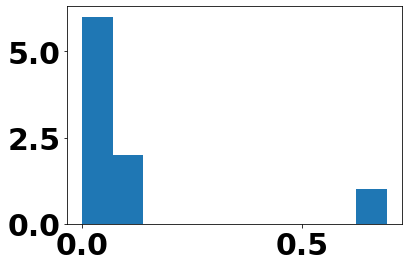

In [ ]:
from matplotlib import rc

# fig, axs = plt.subplots(1, 2, figsize=(33, 22), sharex=True, sharey=True)

plt.rcParams['font.size'] = '30'
rc('font', weight='bold')

r = df2.index
names = ['C1','C2','C1','C2', 'C1','C2']
barWidth = 1

# plt.bar((cohort_2_prop_count/len(cohort_2_prop))[:,0],(cohort_2_prop_count/len(cohort_2_prop))[:,1])
plt.hist(list(df2[0]))

In [ ]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes(df2.index)
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [ ]:
mannwhitneyu(cohort_1_prop, cohort_2_prop, alternative="greater")

MannwhitneyuResult(statistic=162240.5, pvalue=4.1317600095230924e-05)

In [ ]:
mannwhitneyu(cohort_3_prop, cohort_2_prop, alternative="greater")

MannwhitneyuResult(statistic=130501.5, pvalue=0.006379458595649602)

In [ ]:
mannwhitneyu(cohort_1_details_flags["sig_prop"], cohort_2_details_flags["sig_prop"], alternative="greater")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

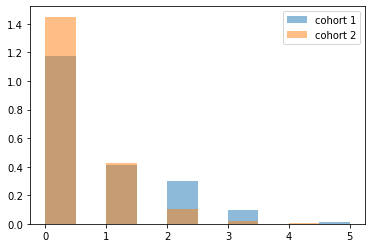

In [ ]:
plt.hist(cohort_1_details_flags["sig_sum"],alpha=0.5, density=True, label='cohort 1')
plt.hist(cohort_2_details_flags["sig_sum"],alpha=0.5, density=True, label='cohort 2')
plt.legend(loc='upper right')

In [ ]:
mannwhitneyu(cohort_3_details_flags["sig_sum"], cohort_2_details_flags["sig_sum"], alternative="greater")

KeyError: 'sig_sum'

In [46]:
RN1502 = Visit("../In2Research_data/data/R/N/RN1502", 2, cohort_1_details, cohort_2_details, cohort_3_details, cohort_4_details)

In [47]:
rolling_variance(RN1502.hr(for_averages=True), for_averages=True)

/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,start_time,end_time,variance
0,2017-09-16 21:00:06,2017-09-16 22:00:10,24.766112
1,2017-09-16 21:01:06,2017-09-16 22:01:10,24.307035
2,2017-09-16 21:02:06,2017-09-16 22:02:10,23.594652
3,2017-09-16 21:03:06,2017-09-16 22:03:10,23.641043
4,2017-09-16 21:04:06,2017-09-16 22:04:10,23.551052
...,...,...,...
153,2017-09-16 23:33:08,2017-09-17 00:33:06,73.857780
154,2017-09-16 23:34:08,2017-09-17 00:34:06,72.029006
155,2017-09-16 23:35:08,2017-09-17 00:35:06,71.005659
156,2017-09-16 23:36:08,2017-09-17 00:36:06,68.059814


/Users/lucindakhalil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0.5, 1.0, 'hr variance')

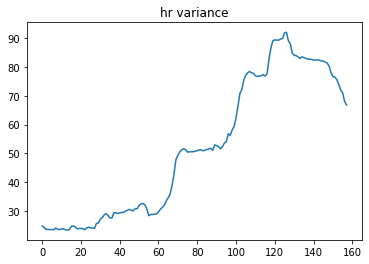

In [48]:
plt.plot(rolling_variance(RN1502.hr(for_averages=True), for_averages=True)["variance"])
plt.title("hr variance")

Text(0.5, 1.0, 'ac variance')

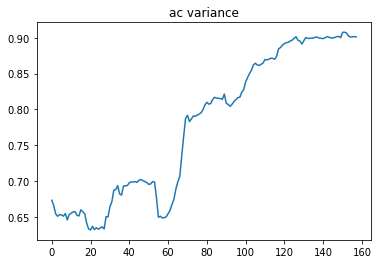

In [49]:
plt.plot(rolling_autocorrelation(RN1502.hr(for_averages=True), for_averages=True)["autocorrelation"])
plt.title("ac variance")

Text(0.5, 1.0, 'rr variance')

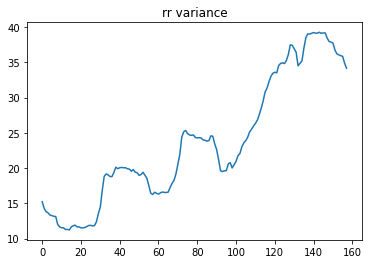

In [50]:
plt.plot(rolling_variance(RN1502.rr(for_averages=True), for_averages=True)["variance"])
plt.title("rr variance")

Text(0.5, 1.0, 'rr autocorrelation')

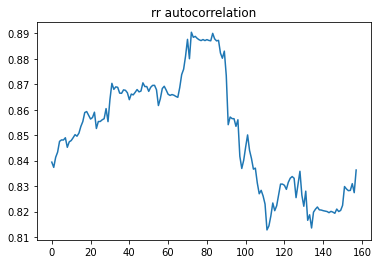

In [51]:
plt.plot(rolling_autocorrelation(RN1502.rr(for_averages=True), for_averages=True)["autocorrelation"])
plt.title("rr autocorrelation")

Text(0.5, 1.0, 'abf variance')

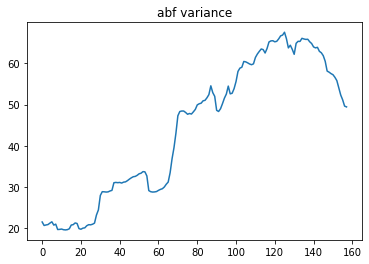

In [52]:
plt.plot(rolling_variance(RN1502.abf(for_averages=True), for_averages=True)["variance"])
plt.title("abf variance")

Text(0.5, 1.0, 'abf autocorrelation')

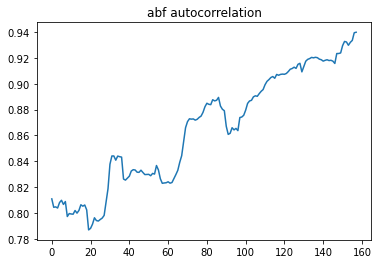

In [53]:
plt.plot(rolling_autocorrelation(RN1502.abf(for_averages=True), for_averages=True)["autocorrelation"])
plt.title("abf autocorrelation")

[Text(0, 0.5, 'Mean Blood Pressure (mmHg)'), Text(0.5, 0, 'Time')]

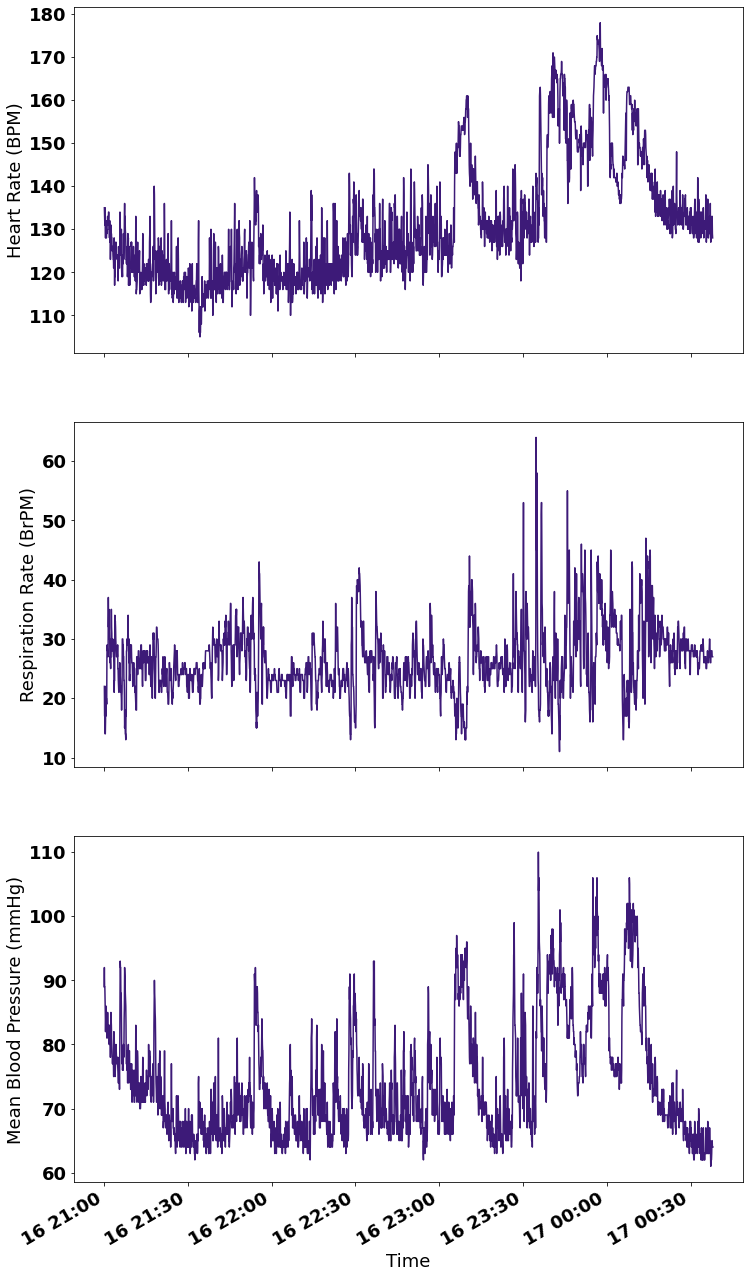

In [76]:
fig, axs = plt.subplots(3, 1, figsize=(12, 24), sharex=True,sharey=False)
rc('font', weight='bold', size=18)
fig.autofmt_xdate()
axs[0].plot(RN1502.hr(for_averages=True)["record_date_time"],RN1502.hr(for_averages=True)["num_value"], color='#3d1a78')
axs[0].set(ylabel = 'Heart Rate (BPM)')
axs[1].plot(RN1502.rr(for_averages=True)["record_date_time"],RN1502.rr(for_averages=True)["num_value"], color='#3d1a78')
axs[1].set(ylabel = 'Respiration Rate (BrPM)')
axs[2].plot(RN1502.abf(for_averages=True)["record_date_time"],RN1502.abf(for_averages=True)["num_value"], color='#3d1a78')
axs[2].set(ylabel = 'Mean Blood Pressure (mmHg)', xlabel='Time')


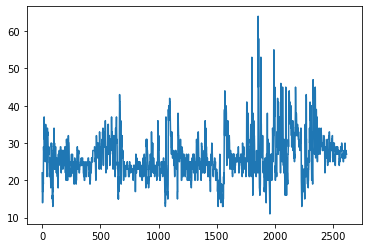

In [ ]:
plt.plot(RN1502.rr(for_averages=True)["num_value"])

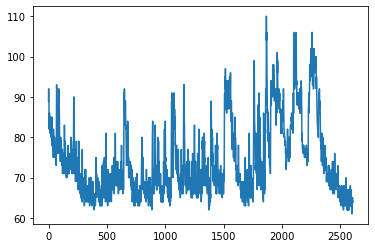

In [ ]:
plt.plot(RN1502.abf(for_averages=True)["num_value"])

In [ ]:
RN1502.details

,Unnamed: 0,Unnamed: 0.1,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,...,age (days),age_category,time_category,pseudo_reintubation,var_hr_flag,var_rr_flag,var_abf_flag,ac_hr_flag,ac_rr_flag,ac_abf_flag
1326,1326,2030,RN1502,2016-02-12,NaN,Female,2,2017-09-16 13:44:00,2017-09-17 15:28:00,NaN,...,582.875,7,8,2017-09-17 00:38:00,1,1,1,1,0,1


In [ ]:
cohort_2_details_flags.groupby(by=["sig_sum"]).count()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,...,age (days),age_category,time_category,pseudo_reintubation,var_hr_flag,var_rr_flag,var_abf_flag,ac_hr_flag,ac_rr_flag,ac_abf_flag
sig_sum,,,,,,,,,,,,,,,,,,,,,
0,1396,1396,1396,1396,1396,0,1396,1396,1396,1396,...,1396,1396,1396,1396,1305,1110,839,1305,1110,839
1,476,476,476,476,476,0,476,476,476,476,...,476,476,476,476,475,409,328,475,409,328
2,115,115,115,115,115,0,115,115,115,115,...,115,115,115,115,115,101,91,115,101,91
3,18,18,18,18,18,0,18,18,18,18,...,18,18,18,18,18,15,17,18,15,17
4,4,4,4,4,4,0,4,4,4,4,...,4,4,4,4,4,3,4,4,3,4
5,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
cohort_1_details_flags.groupby(by=["sig_sum"]).count()

,Unnamed: 0,Unnamed: 0.1,Project ID,birth_deid_date,death_deid_date,sex,icu_visit,icu_start_deid_dttm,icu_end_deid_dttm,failed_extubation_flag,...,icu_ward,total_visits,extubation_duration,age (days),var_hr_flag,var_rr_flag,var_abf_flag,ac_hr_flag,ac_rr_flag,ac_abf_flag
sig_sum,,,,,,,,,,,,,,,,,,,,,
0,60,60,60,60,0,60,60,60,60,60,...,60,60,60,60,52,45,23,52,44,23
1,30,30,30,30,0,30,30,30,30,30,...,30,30,30,30,30,26,18,30,26,18
2,22,22,22,22,0,22,22,22,22,22,...,22,22,22,22,22,22,19,22,22,19
3,7,7,7,7,0,7,7,7,7,7,...,7,7,7,7,7,6,5,7,6,5
5,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
cohort_3_details_flags.groupby(by=["sig_sum"]).count()

KeyError: 'sig_sum'